In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
from scipy import stats
import wquantiles
import statsmodels
import statsmodels.robust.scale
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import sklearn
from pywaffle import Waffle
import scipy

In [2]:
#hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import lib
import sklearn
from pylab import rcParams
rcParams['figure.figsize']=10,8

In [71]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import interp1d
#from scipy.interpolate import Spline
from scipy.interpolate import splrep
from sklearn.neighbors import KNeighborsregressor
from sklearn.kernel_ridge import KernelRidge

ImportError: cannot import name 'KNeighborsregressor' from 'sklearn.neighbors' (D:\Programdata\lib\site-packages\sklearn\neighbors\__init__.py)

# 2.LOAD DATA

In [ ]:
import sys
import types
from botocore.client import Config
import ibm_boto3
def __iter__(self): return 0
client_db221c9083da49bda597e7df5fb8517c=ibm_boto3.client(service_name='s3',
                                                   ibm_api_key_id='TEQH5WwJ-ibyiaYoCxThljJk1N2JcG6vN-kXuCzokf5D',
                                                   ibm_auth_endpoint="https://iam.eu-gb.blueix.net/oidc/token",
                                                   config=Config(signature_version='oauth'),
                                                   endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')
body=client_db221c9083da597e7df5fb8517c.get_object(Bucket='germancreditdataclassificationmod-donotdelete-pr-r4moizhcd0qqf2',key='German_Credit_data.csv')['Body']
if not hasattr(body,"__iter__"):body.__iter__=types.MethodType(__iter__,body)
    
raw_data=pd.read_csv(body)
raw_data.head()

In [ ]:
client_db221c9083da597e7df5fb8517c
client_db221c9083da49bda597e7df5fb8517c

In [ ]:
pip install ibm_boto3.session 

In [5]:
pip install ibm-cos-sdk

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install boto3

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [8]:
pip install botocore

Note: you may need to restart the kernel to use updated packages.


In [9]:
raw_data=pd.read_csv('German_Credit_data.csv')
raw_data.shape

(1000, 21)

In [10]:
raw_data.describe()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Creditability                                      1000 non-null   int64
 1   Status_of_existing_account                         1000 non-null   int64
 2   Duration_of_Credit_month                           1000 non-null   int64
 3   Payment_Status_of_Previous_Credit(Credit_history)  1000 non-null   int64
 4   Purpose_of_loan                                    1000 non-null   int64
 5   Credit_Amount                                      1000 non-null   int64
 6   Value_of_Savings_account&bonds                     1000 non-null   int64
 7   Years_of_Present_Employment                        1000 non-null   int64
 8   Percentage_of_disposable_income                    1000 non-null   int64
 9   Sex_&_Marital_Status           

# 4.EDA

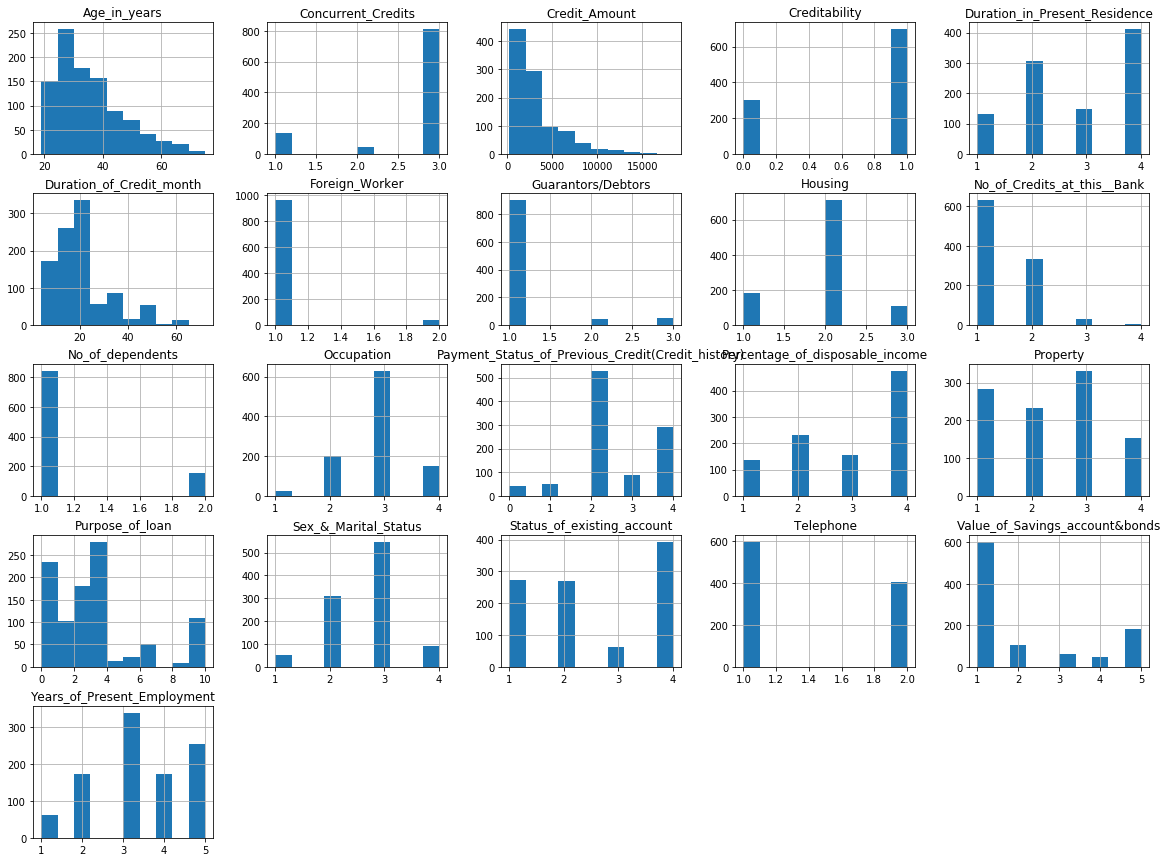

In [12]:
raw_data.hist(figsize=(20,15))
plt.show()

In [13]:
# to understand the number of levels in each variables
raw_data.nunique()

Creditability                                          2
Status_of_existing_account                             4
Duration_of_Credit_month                              33
Payment_Status_of_Previous_Credit(Credit_history)      5
Purpose_of_loan                                       10
Credit_Amount                                        923
Value_of_Savings_account&bonds                         5
Years_of_Present_Employment                            5
Percentage_of_disposable_income                        4
Sex_&_Marital_Status                                   4
Guarantors/Debtors                                     3
Duration_in_Present_Residence                          4
Property                                               4
Age_in_years                                          53
Concurrent_Credits                                     3
Housing                                                3
No_of_Credits_at_this__Bank                            4
Occupation                     

Figure(864x576) [<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B1608E48>


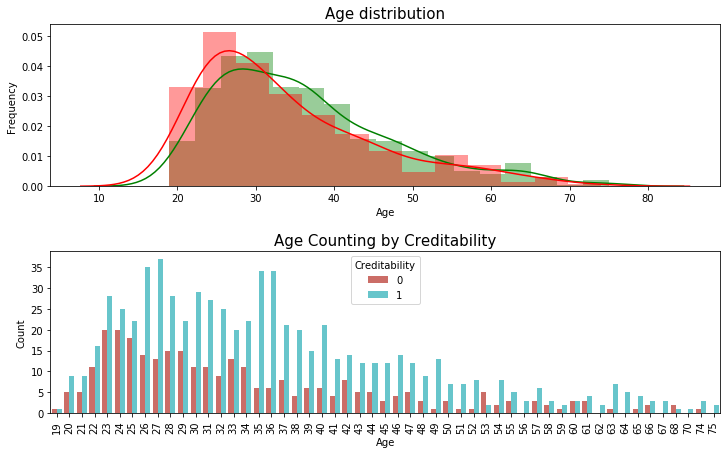

In [14]:
#plotting age distribution
df_good=raw_data[raw_data['Creditability']==1]
df_bad=raw_data[raw_data['Creditability']==0]

fig, ax= plt.subplots(nrows=2, figsize=(12,8))
print(fig,ax)
plt.subplots_adjust(hspace= 0.4, top= 0.8)

g1=sns.distplot(df_good['Age_in_years'], ax=ax[0], color='g')
g1=sns.distplot(df_bad['Age_in_years'], ax=ax[0], color='r')

g1.set_title('Age distribution', fontsize=15)
g1.set_xlabel('Age')
g1.set_ylabel('Frequency')

g2=sns.countplot(x='Age_in_years', data=raw_data, palette='hls', ax=ax[1], hue='Creditability')

g2.set_title('Age Counting by Creditability', fontsize=15)
g2.set_xlabel('Age')
g2.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [15]:
print(raw_data.groupby('Creditability').size())

Creditability
0    300
1    700
dtype: int64


In [16]:
#this gives you the calculation of the target labels.ehich category of the target
total_len = len(raw_data.Creditability)
percentage_labels = (raw_data.Creditability.value_counts()/total_len)*100
percentage_labels

1    70.0
0    30.0
Name: Creditability, dtype: float64

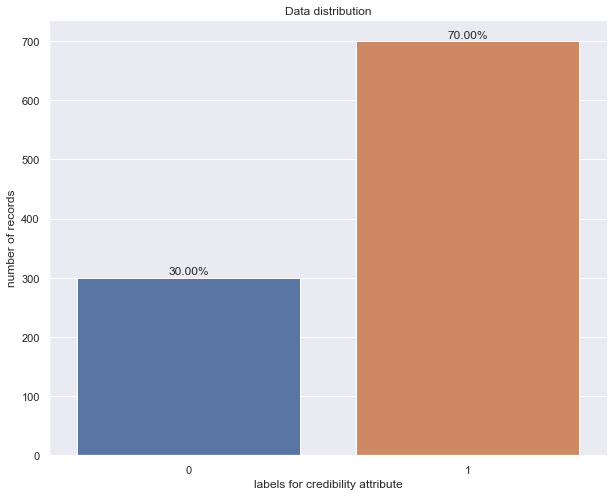

In [17]:
#graphical representation of the target label percnetage
sns.set()
sns.countplot(raw_data.Creditability).set_title('Data distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 2,
            '{:.2f}%'.format(100*(height/total_len)),fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("labels for credibility attribute")
ax.set_ylabel('number of records')
plt.show()

In [18]:
#check correlation
raw_data.corr()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
Creditability,1.000000,0.350847,-0.214927,0.228785,-0.017979,-0.154740,0.178943,0.116002,-0.072404,0.088184,...,-0.002967,-0.142612,0.091272,0.109844,0.018119,0.045732,-0.032735,0.003015,0.036466,0.082079
Status_of_existing_account,0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,...,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.014145,0.066296,-0.035187
Duration_of_Credit_month,-0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,...,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.023834,0.164718,-0.134680
Payment_Status_of_Previous_Credit(Credit_history),0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,...,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose_of_loan,-0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,...,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.032577,0.078371,-0.113244
Credit_Amount,-0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,...,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,-0.030662
Value_of_Savings_account&bonds,0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,...,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.027514,0.087208,0.010450
Years_of_Present_Employment,0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,...,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,-0.022845
Percentage_of_disposable_income,-0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,...,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.071207,0.014413,-0.094762
Sex_&_Marital_Status,0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,...,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.122165,0.027275,0.073103


Text(0.5, 1, 'correlation between features')

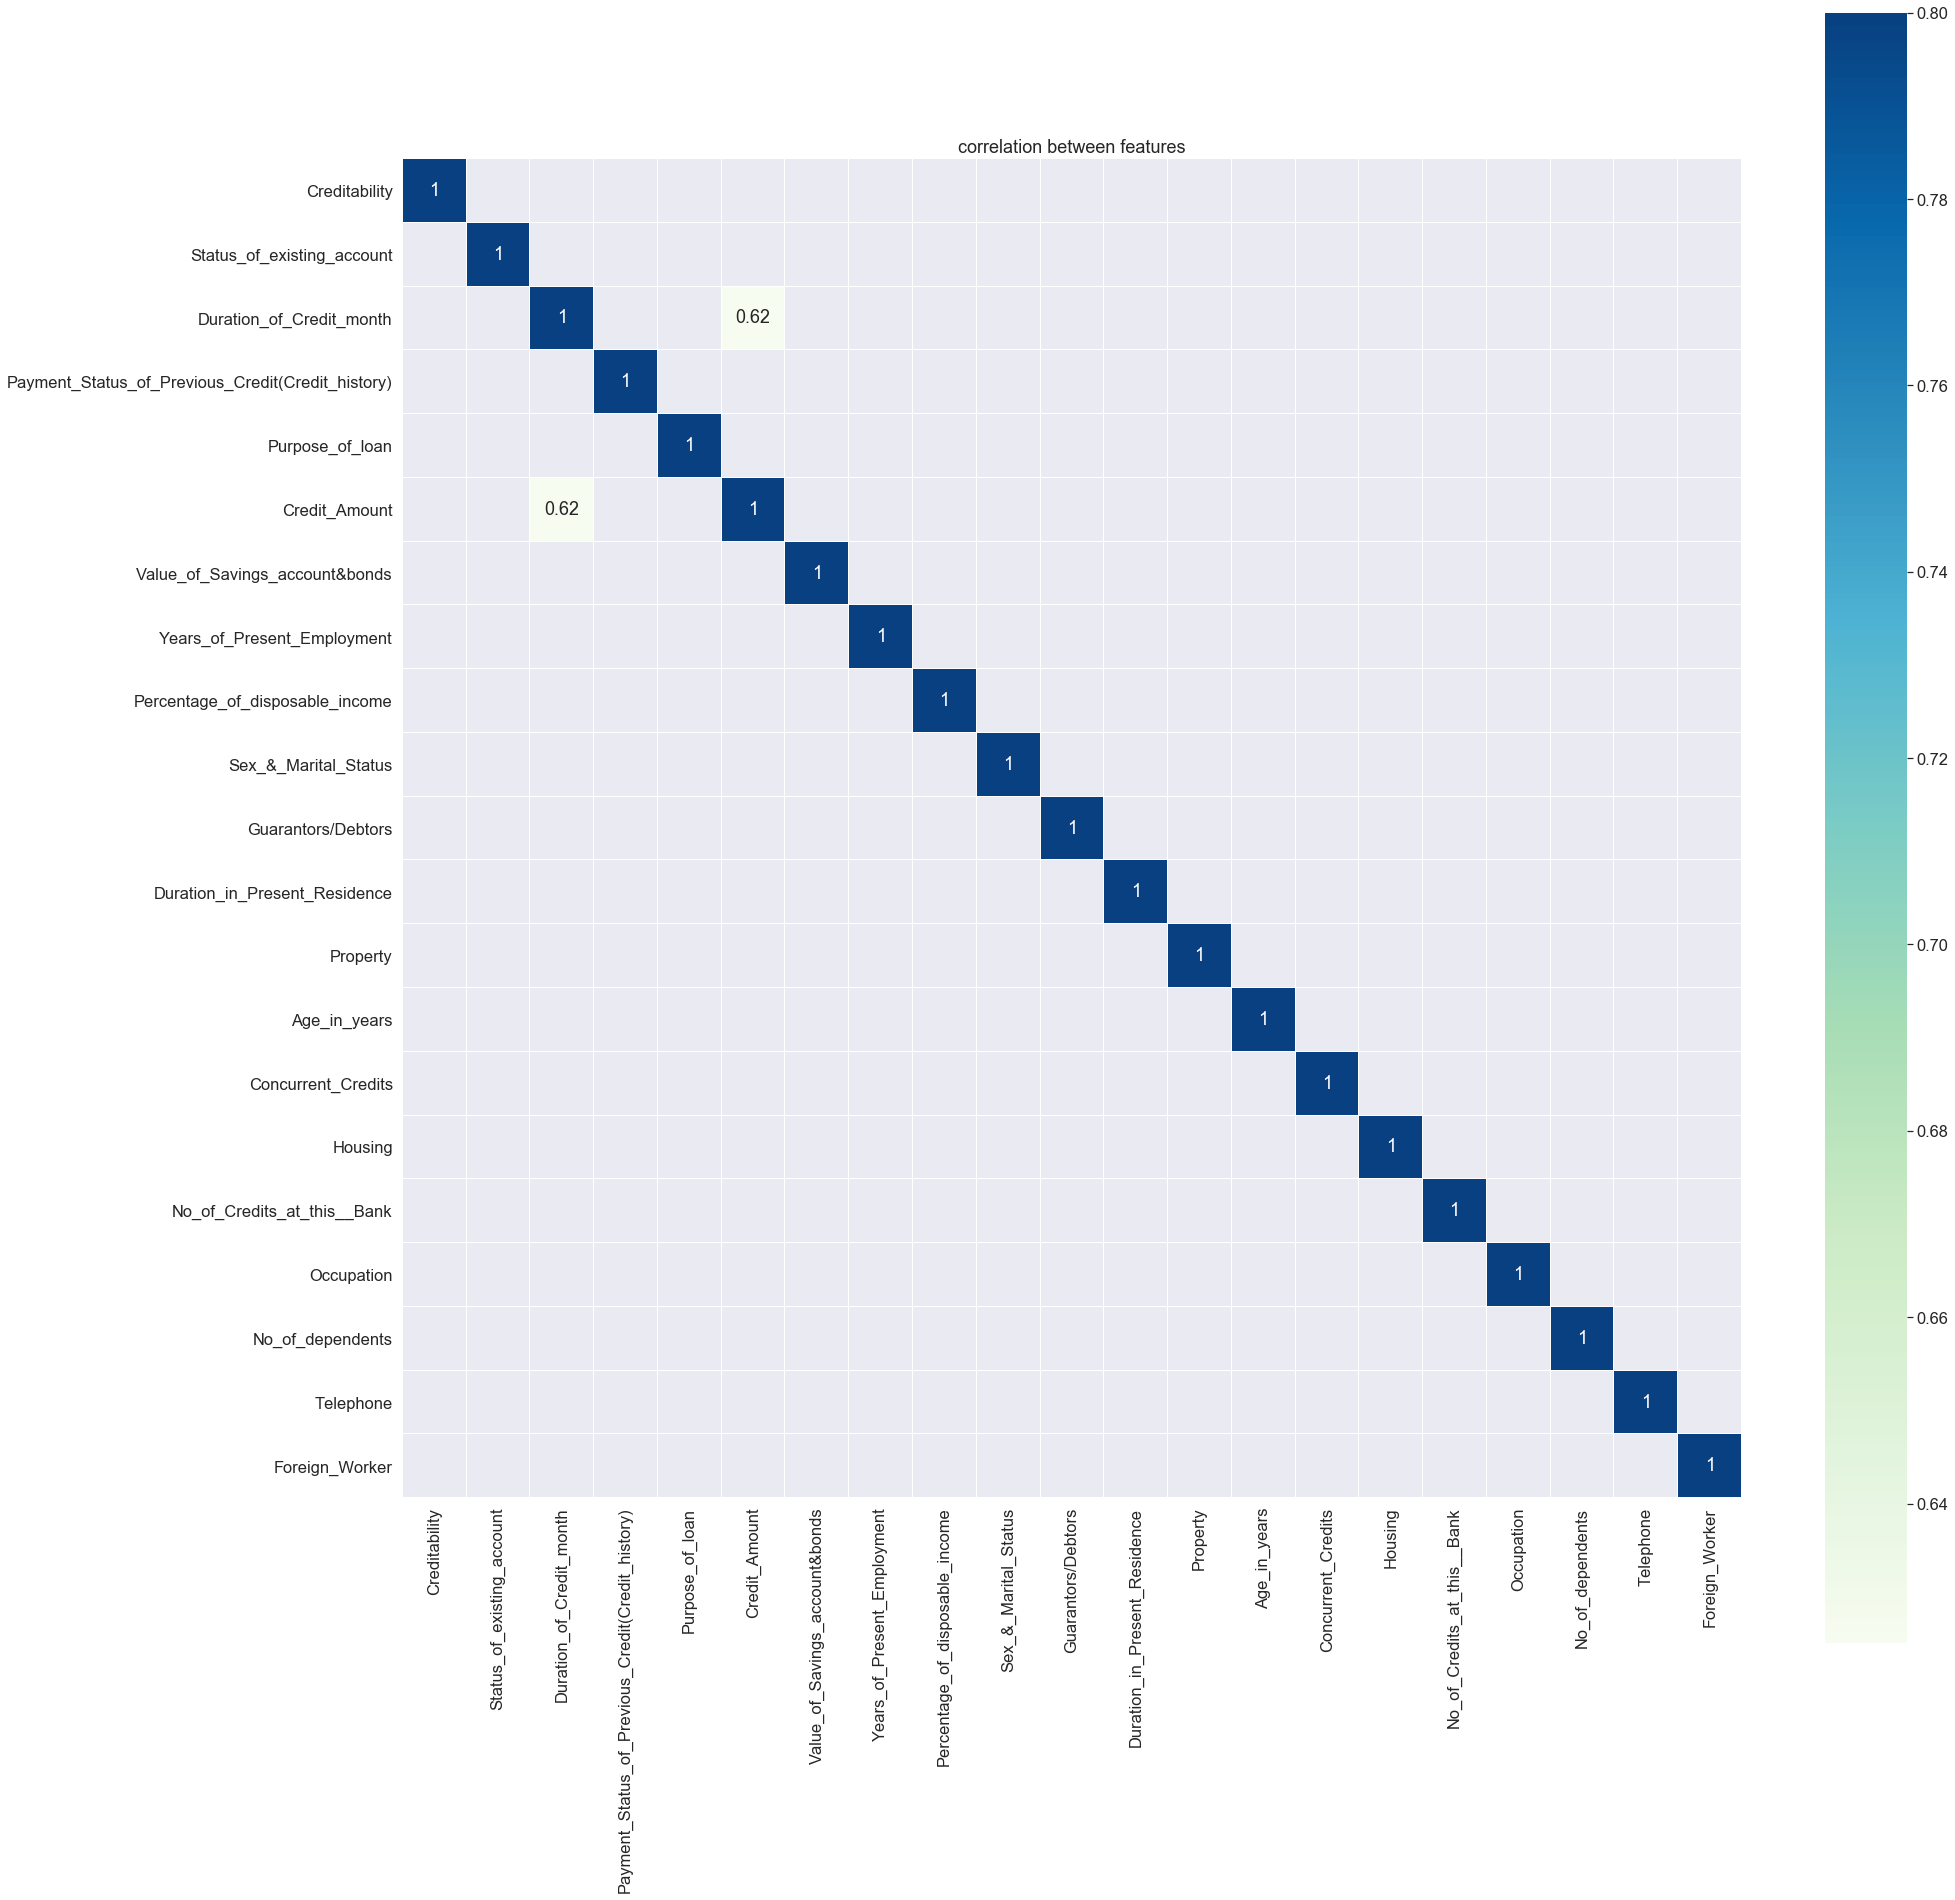

In [19]:
#checking correlation and correlation plot
import matplotlib.pyplot as plt
import seaborn as sns
corr=raw_data.corr()
plt.figure(figsize=(30,30))

sns.heatmap(corr[(corr >=0.5) | (corr <=-0.5)],vmax=.8, linewidths=0.01,
           square=True, annot=True, cmap='GnBu',linecolor="white")
plt.title('correlation between features')

In [20]:
#splitting target variable
predictor = raw_data.iloc[:, raw_data.columns != 'Creditability']
target = raw_data.iloc[:, raw_data.columns == 'Creditability' ]

In [21]:
#let us now split the data set into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictor,target,test_size= 0.30, random_state = 0)
print('x_train', x_train.shape)
print('x_test',x_test.shape)
print('y_train', y_train.shape)
print('y_test',y_test.shape)

x_train (700, 20)
x_test (300, 20)
y_train (700, 1)
y_test (300, 1)


In [22]:
import statsmodels.api as sm

#build logit model
logit = sm.Logit(y_train,x_train)

#fit the model
model1 = logit.fit()

#printing logistic regression model results
model1.summary2()

Optimization terminated successfully.
         Current function value: 0.480402
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: Logit
=================================================================================================
Model:                          Logit                      Pseudo R-squared:           0.197     
Dependent Variable:             Creditability              AIC:                        712.5629  
Date:                           2020-11-03 12:46           BIC:                        803.5845  
No. Observations:               700                        Log-Likelihood:             -336.28   
Df Model:                       19                         LL-Null:                    -418.79   
Df Residuals:                   680                        LLR p-value:                2.6772e-25
Converged:                      1.0000                     Scale:                      1.0000    
No. Iterations:                 6.0000                                                           
-------------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------------
Status_of_existing_account                         0.4939   0.0816  6.0564 0.0000  0.3341  0.6538
Duration_of_Credit_month                          -0.0275   0.0104 -2.6356 0.0084 -0.0479 -0.0070
Payment_Status_of_Previous_Credit(Credit_history)  0.2585   0.1050  2.4622 0.0138  0.0527  0.4642
Purpose_of_loan                                    0.0277   0.0360  0.7702 0.4412 -0.0428  0.0982
Credit_Amount                                     -0.0001   0.0000 -1.3046 0.1920 -0.0002  0.0000
Value_of_Savings_account&bonds                     0.2057   0.0690  2.9831 0.0029  0.0706  0.3409
Years_of_Present_Employment                        0.2084   0.0887  2.3498 0.0188  0.0346  0.3822
Percentage_of_disposable_income                   -0.4662   0.1021 -4.5641 0.0000 -0.6664 -0.2660
Sex_&_Marital_Status                               0.1967   0.1430  1.3756 0.1689 -0.0836  0.4771
Guarantors/Debtors                                 0.0963   0.1984  0.4854 0.6274 -0.2926  0.4852
Duration_in_Present_Residence                     -0.1243   0.0928 -1.3395 0.1804 -0.3061  0.0576
Property                                          -0.2522   0.1095 -2.3023 0.0213 -0.4669 -0.0375
Age_in_years                                       0.0143   0.0105  1.3612 0.1734 -0.0063  0.0349
Concurrent_Credits                                 0.1034   0.1242  0.8330 0.4048 -0.1399  0.3468
Housing                                            0.0873   0.1999  0.4367 0.6623 -0.3045  0.4791
No_of_Credits_at_this__Bank                       -0.0578   0.1916 -0.3018 0.7628 -0.4333  0.3177
Occupation                                        -0.0092   0.1618 -0.0569 0.9546 -0.3262  0.3078
No_of_dependents                                  -0.4558   0.2679 -1.7010 0.0889 -0.9809  0.0694
Telephone                                          0.1890   0.2255  0.8382 0.4019 -0.2530  0.6310
Foreign_Worker                                    -0.0316   0.4583 -0.0691 0.9449 -0.9299  0.8666
=================================================================================================

"""

In [23]:
#predit values using test data
y_pred = model1.predict(x_test)

In [24]:
# making y_pred as DataFrame
predicted_df = pd.DataFrame(y_pred)
predicted_df.head(5)

,0
993,0.841483
859,0.489402
298,0.878734
553,0.945764
672,0.488180


In [30]:
# assinging the class 0 and 1 based on the threshold value 0.5
predicted_df["Predicted_Class"] = np.where(predicted_df[0]>=0.50,1,0)
predicted_df.head()

,0,Predicted_Class
993,0.841483,1
859,0.489402,0
298,0.878734,1
553,0.945764,1
672,0.488180,0


In [31]:
#checking the accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted_df['Predicted_Class']))

0.74


In [32]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_df['Predicted_Class']).ravel()
confusion_matrix

array([ 37,  63,  15, 185], dtype=int64)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted_df['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.71      0.37      0.49       100
           1       0.75      0.93      0.83       200

    accuracy                           0.74       300
   macro avg       0.73      0.65      0.66       300
weighted avg       0.73      0.74      0.71       300



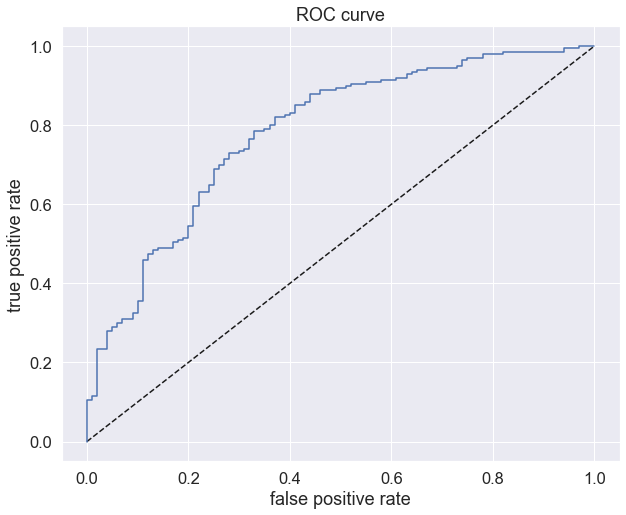

In [34]:
y_pred_prob = model1.predict(x_test)

from sklearn.metrics import roc_curve
#generate ROC curve values: fpr,tpr, thresholds
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)

#plot ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

In [35]:
#AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predicted_df['Predicted_Class'])
#print('area under the curve is', roc_auc_score(y_test,predicted_df['Predicted_Class']))

0.6475

In [36]:
cols = ['Model','R_Squared Value','ROC score','Precision Score','Recall Score','Accuracy_Score', 'Kappa_Score']
models_report = pd.DataFrame(columns=cols)
from sklearn import metrics
tmp1 = pd.Series({'Model': 'Logistic Regressin Base Model',
                 'R_Squared Value': model1.prsquared,
                 'ROC score': metrics.roc_auc_score(y_test,predicted_df['Predicted_Class']),
                 'Precision Score': metrics.precision_score(y_test,predicted_df['Predicted_Class']),
                 'Recall Score': metrics.recall_score(y_test,predicted_df['Predicted_Class']),
                 'Accuracy_Score': metrics.accuracy_score(y_test,predicted_df['Predicted_Class']),
                 'Kappa_Score': metrics.cohen_kappa_score(y_test,predicted_df['Predicted_Class'])})

model1_report = models_report.append(tmp1, ignore_index=True)
model1_report

,Model,R_Squared Value,ROC score,Precision Score,Recall Score,Accuracy_Score,Kappa_Score
0,Logistic Regressin Base Model,0.197014,0.6475,0.745968,0.925,0.74,0.335227


# DECISION TREE

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf_DT1=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5,min_samples_split=2,min_samples_leaf=1)
clf_DT1.fit(x_train,y_train)
y_pred_DT1=clf_DT1.predict(x_test)

In [26]:
# install 'graphviz' package in watson
!pip install --user graphviz

In [52]:
from graphviz import Digraph

In [49]:
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
graph=Source(tree.export_graphviz(clf_DT1,out_file=None))
SVG(graph.pipe(format='svg'))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [38]:
cols = ['Model','ROC score','Precision Score','Recall Score','Accuracy_Score', 'Kappa_Score']
models_report = pd.DataFrame(columns=cols)
from sklearn import metrics
tmp1 = pd.Series({'Model': 'Decision Tree with (Gini and BEST)',
                 'ROC score': metrics.roc_auc_score(y_test,y_pred_DT1),
                 'Precision Score': metrics.precision_score(y_test,y_pred_DT1),
                 'Recall Score': metrics.recall_score(y_test,y_pred_DT1),
                 'Accuracy_Score': metrics.accuracy_score(y_test,y_pred_DT1),
                 'Kappa_Score': metrics.cohen_kappa_score(y_test,y_pred_DT1)})

model1_dt1_report = models_report.append(tmp1, ignore_index=True)
model1_dt1_report

,Model,ROC score,Precision Score,Recall Score,Accuracy_Score,Kappa_Score
0,Decision Tree with (Gini and BEST),0.66,0.757447,0.89,0.736667,0.350685


In [40]:
# building a decision tree model using gini solver and splitter random
clf_DT2=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=10,min_samples_split=2,min_samples_leaf=1)
clf_DT2.fit(x_train,y_train)
y_pred_DT2=clf_DT2.predict(x_test)

In [41]:
graph=Source(tree.export_graphviz(clf_DT2,out_file=None))
SVG(graph.pipe(format='svg'))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [65]:
cols = ['Model','ROC score','Precision Score','Recall Score','Accuracy_Score', 'Kappa_Score']
models_report = pd.DataFrame(columns=cols)
from sklearn import metrics
tmp2 = pd.Series({'Model': 'Decision Tree with (Gini and random)',
                 'ROC score': metrics.roc_auc_score(y_test,y_pred_DT2),
                 'Precision Score': metrics.precision_score(y_test,y_pred_DT2),
                 'Recall Score': metrics.recall_score(y_test,y_pred_DT2),
                 'Accuracy_Score': metrics.accuracy_score(y_test,y_pred_DT2),
                 'Kappa_Score': metrics.cohen_kappa_score(y_test,y_pred_DT2)})

model1_dt2_report = models_report.append(tmp2, ignore_index=True)
model1_dt2_report

,Model,ROC score,Precision Score,Recall Score,Accuracy_Score,Kappa_Score
0,Decision Tree with (Gini and random),0.6725,0.773148,0.835,0.726667,0.359375


In [51]:
clf_DT3=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=10,min_samples_split=2,
                               min_samples_leaf=1,min_weight_fraction_leaf=0.0,min_impurity_split=1e-07)
clf_DT3.fit(x_train,y_train)
y_pred_DT3=clf_DT3.predict(x_test)

In [53]:
graph=Source(tree.export_graphviz(clf_DT3,out_file=None))
SVG(graph.pipe(format='svg'))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [55]:
cols = ['Model','ROC score','Precision Score','Recall Score','Accuracy_Score', 'Kappa_Score']
models_report = pd.DataFrame(columns=cols)
from sklearn import metrics
tmp3 = pd.Series({'Model': 'Decision Tree with (entropy and BEST)',
                 'ROC score': metrics.roc_auc_score(y_test,y_pred_DT3),
                 'Precision Score': metrics.precision_score(y_test,y_pred_DT3),
                 'Recall Score': metrics.recall_score(y_test,y_pred_DT3),
                 'Accuracy_Score': metrics.accuracy_score(y_test,y_pred_DT3),
                 'Kappa_Score': metrics.cohen_kappa_score(y_test,y_pred_DT3)})

model1_dt3_report = models_report.append(tmp3, ignore_index=True)
model1_dt3_report

,Model,ROC score,Precision Score,Recall Score,Accuracy_Score,Kappa_Score
0,Decision Tree with (entropy and BEST),0.61,0.730435,0.84,0.686667,0.237838


In [56]:
clf_DT4=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5,min_samples_split=4,
                               min_samples_leaf=2)
clf_DT4.fit(x_train,y_train)
y_pred_DT4=clf_DT4.predict(x_test)

In [61]:
graph=Source(tree.export_graphviz(clf_DT4,out_file=None))
SVG(graph.pipe(format='svg'))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [59]:
cols = ['Model','ROC score','Precision Score','Recall Score','Accuracy_Score', 'Kappa_Score']
models_report = pd.DataFrame(columns=cols)
from sklearn import metrics
tmp4 = pd.Series({'Model': 'Decision Tree with (entropy and random)',
                 'ROC score': metrics.roc_auc_score(y_test,y_pred_DT4),
                 'Precision Score': metrics.precision_score(y_test,y_pred_DT4),
                 'Recall Score': metrics.recall_score(y_test,y_pred_DT4),
                 'Accuracy_Score': metrics.accuracy_score(y_test,y_pred_DT4),
                 'Kappa_Score': metrics.cohen_kappa_score(y_test,y_pred_DT4)})

model1_dt4_report = models_report.append(tmp4, ignore_index=True)
model1_dt4_report

,Model,ROC score,Precision Score,Recall Score,Accuracy_Score,Kappa_Score
0,Decision Tree with (entropy and random),0.6675,0.759336,0.915,0.75,0.373259


In [60]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [66]:
cols = ['Model','ROC score','Precision Score','Recall Score','Accuracy_Score', 'Kappa_Score']
model_DT=pd.DataFrame(columns=cols)
model_DT=model_DT.append([model1_dt1_report,model1_dt2_report,model1_dt3_report,model1_dt4_report])
model_DT

,Model,ROC score,Precision Score,Recall Score,Accuracy_Score,Kappa_Score
0,Decision Tree with (Gini and BEST),0.6600,0.757447,0.890,0.736667,0.350685
0,Decision Tree with (Gini and random),0.6725,0.773148,0.835,0.726667,0.359375
0,Decision Tree with (entropy and BEST),0.6100,0.730435,0.840,0.686667,0.237838
0,Decision Tree with (entropy and random),0.6675,0.759336,0.915,0.750000,0.373259


Text(0, 0.5, 'Frequency')

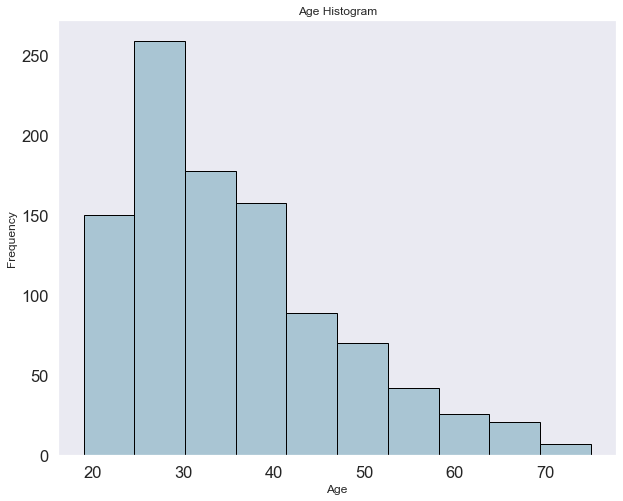

In [67]:
fig,ax=plt.subplots()
raw_data['Age_in_years'].hist(color='#A9C5D3',edgecolor='black',grid=False)
ax.set_title('Age Histogram',fontsize=12)
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)

In [68]:
raw_data['Age_in_years']=pd.qcut(raw_data.Age_in_years,q=6,labels=False)
raw_data['Age_in_years'].unique()

array([0, 3, 4, 5, 2, 1], dtype=int64)

# Decision Tree Pruning

In [69]:
clf_DT5=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=20,
                               random_state=999)
clf_DT5.fit(x_train,y_train)
y_pred_DT5=clf_DT5.predict(x_test)

In [82]:
from sklearn.model_selection import KFold
crossvalidation=KFold(n_splits=raw_data.shape[0],n_folds=10,shuffle=True,random_state=1)
from sklearn.model_selection import cross_val_score
score=np.mean(cross_val_score(clf_DT5,x_train,y_train,scoring='accuracy'))
score

TypeError: __init__() got an unexpected keyword argument 'n_folds'